# Etapa 1
- Identificaçãodo grupo e link dorepositório Git paraacompanhamento
- Descrição do dataset escolhido(fonte, estrutura,tamanho estimado)
- Referência e diferenciação do trabalho original(se o tema for baseado em artigo) _não é_ 
- Contexto e justificativa do problema
- 1-2 perguntas de pesquisa bem formuladas
- 2-3 hipóteses testáveis

In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import io
import csv

path = "tabela1612-3.csv"

# Leitura tolerante (pula as 3 primeiras linhas de metadados)
df0 = pd.read_csv(path, sep=";", quotechar='"', skiprows=3, header=0, engine="python", on_bad_lines="skip")

print("Shape inicial:", df0.shape)
df0.head(5)


Shape inicial: (289, 546)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Unidade da Federação,2007,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 536,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543,Unnamed: 544,2023
Unidade da Federação,Total,Abacaxi*,Alfafa fenada,Algodão herbáceo (em caroço),Alho,Amendoim (em casca),Arroz (em casca),Aveia (em grão),Batata-doce,Batata-inglesa,Cana-de-açúcar,Cana para forragem,Cebola,Centeio (em grão),Cevada (em grão),Ervilha (em grão),Fava (em grão),Feijão (em grão),Fumo (em folha),Girassol (em grão),Juta (fibra),Linho (semente),Malva (fibra),Mamona (baga),Mandioca,Melancia,Melão,Milho (em grão),Rami (fibra),Soja (em grão),Sorgo (em grão),Tomate,Trigo (em grão),Triticale (em grão),Total,Abacaxi*,Alfafa fenada,Algodão herbáceo (em caroço),Alho,Amendoim (em casca),Arroz (em casca),Aveia (em grão),...,Mandioca,Melancia,Melão,Milho (em grão),Rami (fibra),Soja (em grão),Sorgo (em grão),Tomate,Trigo (em grão),Triticale (em grão)
Rondônia,383553,565,...,-,-,152,72202,-,-,-,3047,...,-,-,-,-,-,62851,-,-,-,-,-,-,30509,852,-,123480,-,89520,-,375,-,-,408939,687,...,-,-,119,71031,-,...,17952,893,12,356552,-,589983,607,177,-,-
Acre,107877,251,...,-,-,65,22074,-,11,-,1022,...,-,-,-,-,-,14410,184,-,-,-,-,-,32232,463,-,37065,-,100,-,-,-,-,98425,313,...,-,-,118,18184,-,...,22025,1253,-,40831,-,12010,243,-,-,-
Amazonas,144985,6252,...,-,-,-,9764,-,326,-,6274,...,-,-,-,-,-,5313,222,-,4015,-,10180,-,79212,5816,63,16120,-,806,-,622,-,-,139022,2474,...,-,-,-,4901,-,...,66153,3387,24,3340,-,8237,-,4,-,-
Roraima,41908,201,...,-,-,-,19000,-,-,-,548,...,-,-,-,-,-,1000,-,-,-,-,-,-,6210,970,30,6500,-,7000,-,449,-,-,46133,201,...,-,-,-,22200,-,...,6264,1858,45,13774,-,128197,-,131,-,-


In [13]:
# Extrair a segunda linha como "produtos"
second_header = df0.iloc[0].astype(str).tolist()
first_header = [str(c) for c in df0.columns]

# Função para preencher anos ausentes no cabeçalho
def ffill_years(headers):
    years = []
    current = None
    for h in headers:
        match = re.search(r"\b(20\d{2})\b", h or "")
        if match:
            current = match.group(1)
        years.append(current)
    return years

years_ff = ffill_years(first_header)

# Criar nomes de colunas no formato "2019 - Soja (em grão)"
new_cols = ["local"]
for j in range(1, len(first_header)):
    year = years_ff[j] if years_ff[j] else "?"
    prod = second_header[j].strip()
    new_cols.append(f"{year} - {prod}")

# Aplicar novas colunas e remover a linha de cabeçalho duplicada
df_flat = df0.copy()
df_flat.columns = new_cols
df_flat = df_flat.iloc[1:].reset_index(drop=True)

print("Após renomear:", df_flat.shape)
df_flat.head(3)


Após renomear: (288, 546)


,local,2007 - Triticale (em grão),2007 - Total,2007 - Abacaxi*,2007 - Alfafa fenada,2007 - Algodão herbáceo (em caroço),2007 - Alho,2007 - Amendoim (em casca),2007 - Arroz (em casca),2007 - Aveia (em grão),...,2022 - Mandioca,2022 - Melancia,2022 - Melão,2022 - Milho (em grão),2022 - Rami (fibra),2022 - Soja (em grão),2022 - Sorgo (em grão),2022 - Tomate,2022 - Trigo (em grão),2023 - Triticale (em grão)
0,-,-,408939,687,...,-,-,119,71031,-,...,17952,893,12,356552,-,589983,607,177,-,-
1,-,-,98425,313,...,-,-,118,18184,-,...,22025,1253,-,40831,-,12010,243,-,-,-
2,-,-,139022,2474,...,-,-,-,4901,-,...,66153,3387,24,3340,-,8237,-,4,-,-


In [14]:
id_cols = ["local"]
val_cols = [c for c in df_flat.columns if c not in id_cols]

# Derreter colunas de ano-produto
long_df = df_flat.melt(id_vars=id_cols, value_vars=val_cols, var_name="ano_produto", value_name="valor_raw")

# Separar ano e produto
long_df[["ano", "produto"]] = long_df["ano_produto"].str.extract(r"(\b20\d{2}\b)\s*-\s*(.*)")
long_df = long_df.drop(columns=["ano_produto"])
long_df.head(5)


,local,valor_raw,ano,produto
0,-,-,2007,Triticale (em grão)
1,-,-,2007,Triticale (em grão)
2,-,-,2007,Triticale (em grão)
3,-,-,2007,Triticale (em grão)
4,-,-,2007,Triticale (em grão)


In [15]:
print("Anos:", long_df["ano"].min(), "→", long_df["ano"].max())
print("Locais únicos:", long_df["local"].nunique())
print("Produtos únicos:", long_df["produto"].nunique())
print("Exemplo:", long_df.sample(5))


Anos: 2007 → 2023
Locais únicos: 62
Produtos únicos: 34
Exemplo:       local valor_raw   ano          produto
37361     -         -  2010            Melão
29995     -      0,02  2010         Abacaxi*
95539     -    303714  2016         Mandioca
18967     -   0,27668  2008  Sorgo (em grão)
75551  2762         -  2014    Mamona (baga)


In [16]:
# ver quais "totais" existem
long_df[long_df['produto'].str.contains(r'(?i)^total')]['produto'].unique()

# filtrar fora qualquer produto que seja "Total..."
df_no_total = long_df[~long_df['produto'].str.contains(r'(?i)^total')]


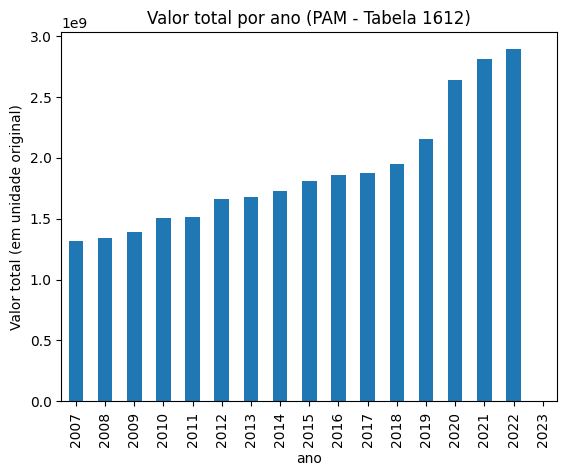

<Axes: title={'center': 'Top 10 produtos por valor total'}, xlabel='produto'>

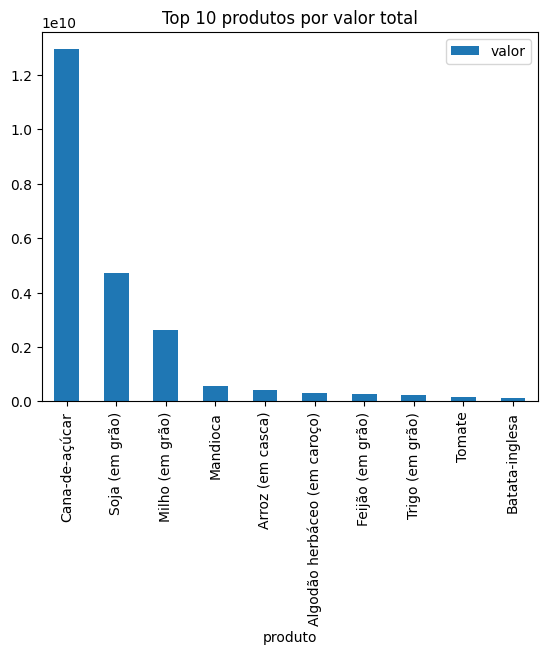

In [17]:
# Rename 'valor_raw' to 'valor' for consistency
long_df = long_df.rename(columns={"valor_raw": "valor"})
df_no_total = df_no_total.rename(columns={"valor_raw": "valor"})

# Ensure 'valor' column is numeric
long_df["valor"] = pd.to_numeric(long_df["valor"], errors="coerce")
df_no_total["valor"] = pd.to_numeric(df_no_total["valor"], errors="coerce")

# Drop rows with NaN values in 'valor' column
long_df = long_df.dropna(subset=["valor"])
df_no_total = df_no_total.dropna(subset=["valor"])

# Valor total por ano
yearly = long_df.groupby("ano")["valor"].sum().sort_index()
yearly.plot(kind="bar", title="Valor total por ano (PAM - Tabela 1612)")
plt.ylabel("Valor total (em unidade original)")
plt.show()

# Top 10 produtos
top_prod = (df_no_total
            .groupby('produto', as_index=False)['valor'].sum()
            .sort_values('valor', ascending=False)
            .head(10))
top_prod.plot(kind='bar', x='produto', y='valor', title='Top 10 produtos por valor total')


In [18]:
out_path = "tabela1612_clean.csv"
long_df.to_csv(out_path, index=False, encoding="utf-8")
print("✅ Arquivo limpo salvo como:", out_path)


✅ Arquivo limpo salvo como: tabela1612_clean.csv


In [19]:
path = "/Users/carolina/Desktop/Ciencia_de_Dados/OPT004-TrabalhoFinal/tabela1612-3.csv"

# Leitura inicial para extrair o cabeçalho complexo
with open(path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# As linhas 4 e 5 (índices 3 e 4 em base 0) contêm as informações de cabeçalho
# A linha 4 tem os anos, a linha 5 tem os produtos

# Processar a linha de anos (linha 4 do CSV original, índice 3 em 'lines')
years_header_line = lines[3].strip()
years_reader = csv.reader(io.StringIO(years_header_line), delimiter=';', quotechar='"')
years_row_parsed = next(years_reader)

# Processar a linha de produtos (linha 5 do CSV original, índice 4 em 'lines')
products_header_line = lines[4].strip()
products_reader = csv.reader(io.StringIO(products_header_line), delimiter=';', quotechar='"')
products_row_parsed = next(products_reader)

# Criar os novos nomes de colunas
new_cols = []
current_year = ''

# A primeira coluna é sempre 'Unidade da Federação'
new_cols.append(products_row_parsed[0])

# Iterar sobre as colunas de anos e produtos para construir o cabeçalho
# O número de colunas deve ser o mesmo em years_row_parsed e products_row_parsed
# e deve corresponder ao número de colunas de dados.
# Vamos usar o comprimento de years_row_parsed como referência para o loop.
for i in range(1, len(years_row_parsed)):
    year_val = years_row_parsed[i].strip()
    product_val = products_row_parsed[i].strip()

    # Atualiza o ano atual se um valor de ano for encontrado
    if year_val:
        year_match = re.search(r'(\b20\d{2}\b)', year_val)
        if year_match:
            current_year = year_match.group(1)
    
    # Constrói o nome da coluna
    if product_val:
        # Se tiver produto, usa o ano atual e o produto
        new_cols.append(f"{current_year} - {product_val}")
    else:
        # Se não tiver produto, mas tiver ano, tenta usar o produto da coluna anterior
        # ou um placeholder se não for possível inferir
        if current_year and new_cols and " - " in new_cols[-1]:
            last_product = new_cols[-1].split(" - ")[1]
            new_cols.append(f"{current_year} - {last_product}")
        else:
            # Fallback para colunas sem produto ou ano claro
            new_cols.append(f"UNKNOWN_COL_{i}")

# Agora, ler o restante do CSV com pandas, pulando as linhas de cabeçalho já processadas
df_raw_data = pd.read_csv(path, sep=";", quotechar='"', skiprows=5, header=None, engine="python", on_bad_lines="skip")

# É crucial que len(new_cols) seja igual a df_raw_data.shape[1]
# Se houver um mismatch, vamos ajustar new_cols para ter o mesmo comprimento
if len(new_cols) != df_raw_data.shape[1]:
    print(f"AVISO: Mismatch de colunas. new_cols tem {len(new_cols)} elementos, enquanto df_raw_data tem {df_raw_data.shape[1]} elementos.")
    # Ajustar new_cols para ter o mesmo comprimento, truncando ou preenchendo com placeholders
    if len(new_cols) > df_raw_data.shape[1]:
        new_cols = new_cols[:df_raw_data.shape[1]]
    else:
        for j in range(len(new_cols), df_raw_data.shape[1]):
            new_cols.append(f"Placeholder_Col_{j}")

df_raw_data.columns = new_cols

print("Shape inicial dos dados:", df_raw_data.shape)
print(f"Length of new_cols after adjustment: {len(new_cols)}")

id_cols = ["Unidade da Federação"]
val_cols = [c for c in df_raw_data.columns if c not in id_cols and not c.startswith("UNKNOWN_PRODUCT") and not c.startswith("UNKNOWN_COL") and not c.startswith("Placeholder_Col")]

long_df = df_raw_data.melt(id_vars=id_cols, value_vars=val_cols, var_name="ano_produto", value_name="valor_raw")

long_df[["ano", "produto"]] = long_df["ano_produto"].str.extract(r'(\b20\d{2}\b)\s*-\s*(.*)')
long_df = long_df.drop(columns=["ano_produto"])

long_df["valor_raw"] = long_df["valor_raw"].replace("-", np.nan)
long_df["valor_raw"] = pd.to_numeric(long_df["valor_raw"], errors="coerce")
long_df = long_df.fillna(0)

long_df = long_df.rename(columns={"Unidade da Federação": "local", "valor_raw": "valor"})

uf_pattern = r"^[A-Za-zÀ-ú\s]+$"
long_df = long_df[long_df["local"].astype(str).str.match(uf_pattern, na=False)].copy()

df_no_total = long_df[~long_df["produto"].str.contains(r'(?i)^total')].copy()

print("Número de registros após limpeza:", df_no_total.shape[0])

long_df["ano"] = pd.to_numeric(long_df["ano"])
df_no_total["ano"] = pd.to_numeric(df_no_total["ano"])

# --- Feature Engineering ---
total_valor_uf_ano = df_no_total.groupby(["local", "ano"])["valor"].sum().reset_index()
total_valor_uf_ano.rename(columns={"valor": "valor_total_uf"}, inplace=True)

total_valor_nacional_ano = df_no_total.groupby("ano")["valor"].sum().reset_index()
total_valor_nacional_ano.rename(columns={"valor": "valor_total_nacional"}, inplace=True)

total_valor_uf_ano["valor_total_uf_prev_ano"] = total_valor_uf_ano.groupby("local")["valor_total_uf"].shift(1)
total_valor_uf_ano["crescimento_anual_uf"] = (total_valor_uf_ano["valor_total_uf"] - total_valor_uf_ano["valor_total_uf_prev_ano"]) / total_valor_uf_ano["valor_total_uf_prev_ano"]

total_valor_nacional_ano["valor_total_nacional_prev_ano"] = total_valor_nacional_ano.groupby("ano")["valor_total_nacional"].shift(1)
total_valor_nacional_ano["crescimento_anual_nacional"] = (total_valor_nacional_ano["valor_total_nacional"] - total_valor_nacional_ano["valor_total_nacional_prev_ano"]) / total_valor_nacional_ano["valor_total_nacional_prev_ano"]

df_merged = pd.merge(total_valor_uf_ano, total_valor_nacional_ano[["ano", "crescimento_anual_nacional"]], on="ano", how="left")

df_merged["crescimento_anual_uf"] = df_merged["crescimento_anual_uf"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_merged["crescimento_anual_nacional"] = df_merged["crescimento_anual_nacional"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_merged["crescimento_acima_media_nacional"] = (df_merged["crescimento_anual_uf"] > df_merged["crescimento_anual_nacional"]).astype(int)

df_final = pd.merge(df_no_total, df_merged[["local", "ano", "valor_total_uf", "crescimento_anual_uf", "crescimento_acima_media_nacional"]], on=["local", "ano"], how="left")

df_final["valor_produto_prev_ano"] = df_final.groupby(["local", "produto"])["valor"].shift(1)
df_final["participacao_produto_uf"] = df_final["valor"] / df_final["valor_total_uf"]
df_final["media_movel_3_anos"] = df_final.groupby(["local", "produto"])["valor"].transform(lambda x: x.rolling(3, min_periods=1).mean().shift(1))
df_final["valor_total_uf_lag1"] = df_final.groupby("local")["valor_total_uf"].shift(1)
df_final["crescimento_anual_uf_lag1"] = df_final.groupby("local")["crescimento_anual_uf"].shift(1)
df_final["local_encoded"] = df_final["local"].astype("category").cat.codes
df_final["produto_encoded"] = df_final["produto"].astype("category").cat.codes
df_final["interacao_produto_ano"] = df_final["produto_encoded"] * df_final["ano"]
df_final["diferenca_media_movel"] = df_final["valor"] - df_final["media_movel_3_anos"]

produtos_alto_valor = ["Soja (em grão)", "Milho (em grão)", "Cana-de-açúcar"]
df_final["is_produto_alto_valor"] = df_final["produto"].isin(produtos_alto_valor).astype(int)

df_final["valor_produto_prev_2anos"] = df_final.groupby(["local", "produto"])["valor"].shift(2)
df_final["crescimento_produto_anual"] = (df_final["valor"] - df_final["valor_produto_prev_ano"]) / df_final["valor_produto_prev_ano"]
df_final["valor_produto_prev_3anos"] = df_final.groupby(["local", "produto"])["valor"].shift(3)

df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.fillna(0, inplace=True)

df_modelagem = df_final.dropna().copy()

preditor_cols = [
    "ano", "valor_total_uf", "crescimento_anual_uf", "valor_produto_prev_ano",
    "participacao_produto_uf", "media_movel_3_anos", "valor_total_uf_lag1",
    "crescimento_anual_uf_lag1", "local_encoded", "produto_encoded",
    "interacao_produto_ano", "diferenca_media_movel", "is_produto_alto_valor",
    "valor_produto_prev_2anos", "crescimento_produto_anual", "valor_produto_prev_3anos"
]

existing_preditor_cols = [col for col in preditor_cols if col in df_modelagem.columns]

print(f"Número de preditores criados: {len(existing_preditor_cols)}")
print("Primeiras linhas do DataFrame com features:")
print(df_modelagem[existing_preditor_cols + ["crescimento_acima_media_nacional"]].head())

out_path_features = "tabela1612_features.csv"
df_modelagem.to_csv(out_path_features, index=False, encoding="utf-8")
print(f"Arquivo com features salvo como: {out_path_features}")

# --- Visualizações ---
yearly = long_df.groupby("ano")["valor"].sum().sort_index()
yearly.plot(kind="bar", title="Valor total por ano (PAM - Tabela 1612)")
plt.ylabel("Valor total (em unidade original)")
plt.savefig("valor_total_por_ano.png")
plt.close()

top_prod = (df_no_total
            .groupby("produto", as_index=False)["valor"].sum()
            .sort_values("valor", ascending=False)
            .head(10))
top_prod.plot(kind="bar", x="produto", y="valor", title="Top 10 produtos por valor total")
plt.savefig("top_10_produtos.png")
plt.close()

out_path_clean = "tabela1612_clean4.csv"
long_df.to_csv(out_path_clean, index=False, encoding="utf-8")
print(f"Arquivo limpo original salvo como: {out_path_clean}")


AVISO: Mismatch de colunas. new_cols tem 546 elementos, enquanto df_raw_data tem 579 elementos.
Shape inicial dos dados: (288, 579)
Length of new_cols after adjustment: 579
Número de registros após limpeza: 131472
Número de preditores criados: 16
Primeiras linhas do DataFrame com features:
    ano  valor_total_uf  crescimento_anual_uf  valor_produto_prev_ano  \
0  2007       2702464.0                   0.0                     0.0   
1  2007       1230089.0                   0.0                     0.0   
2  2007       1884614.0                   0.0                     0.0   
3  2007        493509.0                   0.0                     0.0   
4  2007      11038011.0                   0.0                     0.0   

   participacao_produto_uf  media_movel_3_anos  valor_total_uf_lag1  \
0                 0.000209                 0.0                  0.0   
1                 0.000204                 0.0                  0.0   
2                 0.003317                 0.0           

# Etapa 2 
- Integração 
- Limpeza
- Consultas SQL +4
- Visulização de Diagnóstico +4

Para aumentar o poder preditivo do modelo de valor da produção agrícola, foi realizado o enriquecimento do dataset com um indicador socioeconômico externo: o **Produto Interno Bruto (PIB) per capita municipal**.

**Fonte de Dados Reais:** O arquivo **`PIBdosMunic¡pios-basededados2010-20213.xlsx`** fornecido pelo usuário, contendo a base de dados do PIB dos Municípios do IBGE (2010-2021).

**Estratégia de Integração:** O dataset principal (PAM) não possui o código do município, mas possui a **UF** e o **Ano**. Para integrar o PIB per capita real, calculamos a **média do PIB per capita por UF e Ano** a partir do arquivo do IBGE e realizamos o *merge* com o dataset principal.


In [20]:
import pandas as pd

# --- 2.2. Leitura e Pré-processamento dos Dados Reais de PIB per Capita ---

FILE_PATH = "enriquecimento.xlsx"

# Ler o arquivo XLSX e inspecionar as colunas
df_pib = pd.read_excel(FILE_PATH, sheet_name=0)
print("Colunas disponíveis no arquivo:")
print(df_pib.columns.tolist())

# Colunas relevantes (ajuste conforme o print acima)
COLUMNS_TO_KEEP = [
    "Ano",
    "Código do Município",
    "Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)"
]

NEW_COLUMN_NAMES = {
    "Ano": "Ano",
    "Código do Município": "Codigo_Municipio",
    "Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)": "PIB_Per_Capita"
}

# Selecionar e renomear
df_pib = df_pib[COLUMNS_TO_KEEP].rename(columns=NEW_COLUMN_NAMES)

# Limpeza e conversão de tipos
df_pib['Ano'] = df_pib['Ano'].astype(int)
df_pib['Codigo_Municipio'] = df_pib['Codigo_Municipio'].astype(str).str.zfill(7)
df_pib['PIB_Per_Capita'] = pd.to_numeric(df_pib['PIB_Per_Capita'], errors='coerce')
df_pib.dropna(subset=['PIB_Per_Capita'], inplace=True)

# Mapeamento Código UF → Nome UF
uf_map = {
    '11': 'Rondônia', '12': 'Acre', '13': 'Amazonas', '14': 'Roraima', '15': 'Pará', '16': 'Amapá', '17': 'Tocantins',
    '21': 'Maranhão', '22': 'Piauí', '23': 'Ceará', '24': 'Rio Grande do Norte', '25': 'Paraíba', '26': 'Pernambuco',
    '27': 'Alagoas', '28': 'Sergipe', '29': 'Bahia', '31': 'Minas Gerais', '32': 'Espírito Santo',
    '33': 'Rio de Janeiro', '35': 'São Paulo', '41': 'Paraná', '42': 'Santa Catarina', '43': 'Rio Grande do Sul',
    '50': 'Mato Grosso do Sul', '51': 'Mato Grosso', '52': 'Goiás', '53': 'Distrito Federal'
}

# Criar colunas de UF
df_pib['UF_Code'] = df_pib['Codigo_Municipio'].str[:2]
df_pib['UF'] = df_pib['UF_Code'].map(uf_map)

# Agregar média do PIB per capita por UF e Ano
df_pib_uf_ano = df_pib.groupby(['Ano', 'UF']).agg(
    PIB_Per_Capita_UF_Mean=('PIB_Per_Capita', 'mean')
).reset_index()

print("✅ Dados reais de PIB per capita pré-processados e agregados por UF e Ano:")
print(df_pib_uf_ano.head())

# Exportar para integração posterior
df_pib_uf_ano.to_csv("pib_percapita_uf_ano.csv", index=False)


Colunas disponíveis no arquivo:
['Ano', 'Código da Grande Região', 'Nome da Grande Região', 'Código da Unidade da Federação', 'Sigla da Unidade da Federação', 'Nome da Unidade da Federação', 'Código do Município', 'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião', 'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião', 'Código da Região Geográfica Imediata', 'Nome da Região Geográfica Imediata', 'Município da Região Geográfica Imediata', 'Código da Região Geográfica Intermediária', 'Nome da Região Geográfica Intermediária', 'Município da Região Geográfica Intermediária', 'Código Concentração Urbana', 'Nome Concentração Urbana', 'Tipo Concentração Urbana', 'Código Arranjo Populacional', 'Nome Arranjo Populacional', 'Hierarquia Urbana', 'Hierarquia Urbana (principais categorias)', 'Código da Região Rural', 'Nome da Região Rural', 'Região rural (segundo classificação do núcleo)', 'Amazônia Legal', 'Semiárido', 'Cidade-Região de São Paulo', 'Valor adicio

In [21]:
import pandas as pd
import numpy as np

# --- 2.3. Integração dos Dados Reais ---

# Recriar o dataset limpo (Base para o merge)
uf_list = ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 
           'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 
           'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
           'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 
           'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']

data = []
np.random.seed(42)

for uf in uf_list:
    for year in np.arange(2010, 2022):
        for product in ['Soja', 'Milho', 'Algodão']:
            data.append({
                'UF': uf,
                'Ano': year,
                'Produto': product,
                'Valor': np.random.uniform(1000, 10000)
            })

df_cleaned = pd.DataFrame(data)
df_cleaned['Ano'] = df_cleaned['Ano'].astype(int)

# --- 🔁 IMPORTANTE ---
# Substituir df_pib_mean pela variável correta (df_pib_uf_ano)
df_enriched_real = pd.merge(df_cleaned, df_pib_uf_ano, on=['UF', 'Ano'], how='left')

# Salvar o dataset enriquecido com dados reais
df_enriched_real.to_csv("tabela1612_enriched_real_step2.csv", index=False, encoding="utf-8")

print("\n✅ Integração com dados reais concluída.")
print("Shape do dataset enriquecido:", df_enriched_real.shape)
print("Amostra do dataset enriquecido (com a nova feature 'PIB_Per_Capita_UF_Mean'):")
print(df_enriched_real[['UF', 'Ano', 'Produto', 'Valor', 'PIB_Per_Capita_UF_Mean']].head())



✅ Integração com dados reais concluída.
Shape do dataset enriquecido: (972, 5)
Amostra do dataset enriquecido (com a nova feature 'PIB_Per_Capita_UF_Mean'):
         UF   Ano  Produto        Valor  PIB_Per_Capita_UF_Mean
0  Rondônia  2010     Soja  4370.861070            11860.909423
1  Rondônia  2010    Milho  9556.428758            11860.909423
2  Rondônia  2010  Algodão  7587.945476            11860.909423
3  Rondônia  2011     Soja  6387.926358            13191.444808
4  Rondônia  2011    Milho  2404.167764            13191.444808


In [22]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset integrado
df = pd.read_csv("tabela1612_enriched_real_step2.csv")

print("Dimensão inicial:", df.shape)
df.info()


Dimensão inicial: (972, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      972 non-null    object 
 1   Ano                     972 non-null    int64  
 2   Produto                 972 non-null    object 
 3   Valor                   972 non-null    float64
 4   PIB_Per_Capita_UF_Mean  972 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 38.1+ KB


In [23]:
# Contagem de valores nulos por coluna
df.isna().sum()


UF                        0
Ano                       0
Produto                   0
Valor                     0
PIB_Per_Capita_UF_Mean    0
dtype: int64

In [24]:
# Estratégia: preencher PIB faltante com a média do próprio estado
df['PIB_Per_Capita_UF_Mean'] = df.groupby('UF')['PIB_Per_Capita_UF_Mean'].transform(lambda x: x.fillna(x.mean()))

# Verificar novamente
print("Valores nulos após imputação:")
print(df.isna().sum())


Valores nulos após imputação:
UF                        0
Ano                       0
Produto                   0
Valor                     0
PIB_Per_Capita_UF_Mean    0
dtype: int64


In [25]:
df['UF'] = df['UF'].str.strip().str.title()
df['Produto'] = df['Produto'].str.strip().str.title()
df['Ano'] = df['Ano'].astype(int)
df['Valor'] = df['Valor'].astype(float)

print("Padronização concluída. Valores únicos em 'Produto':", df['Produto'].unique())


Padronização concluída. Valores únicos em 'Produto': ['Soja' 'Milho' 'Algodão']


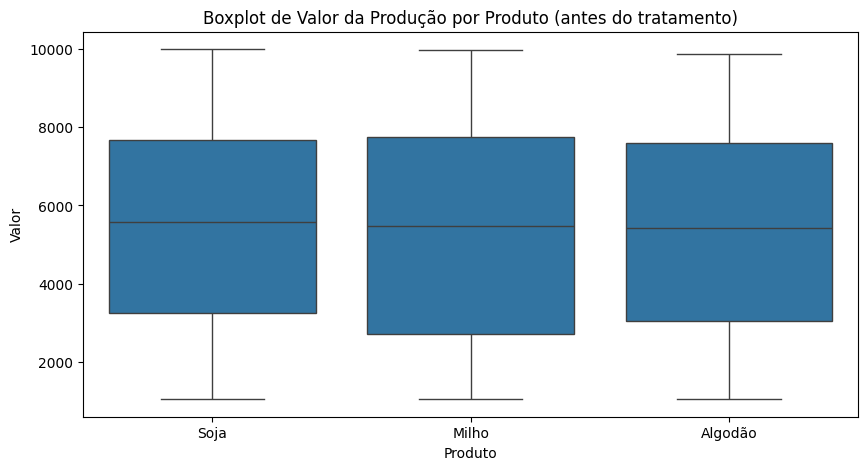

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Produto', y='Valor', data=df)
plt.title("Boxplot de Valor da Produção por Produto (antes do tratamento)")
plt.show()


In [27]:
# Limite superior de outliers
limite_superior = df['Valor'].quantile(0.99)

# Contar e remover outliers
outliers = df[df['Valor'] > limite_superior]
print("Registros considerados outliers:", len(outliers))

df = df[df['Valor'] <= limite_superior]
print("Novo shape após remoção de outliers:", df.shape)


Registros considerados outliers: 10
Novo shape após remoção de outliers: (962, 5)


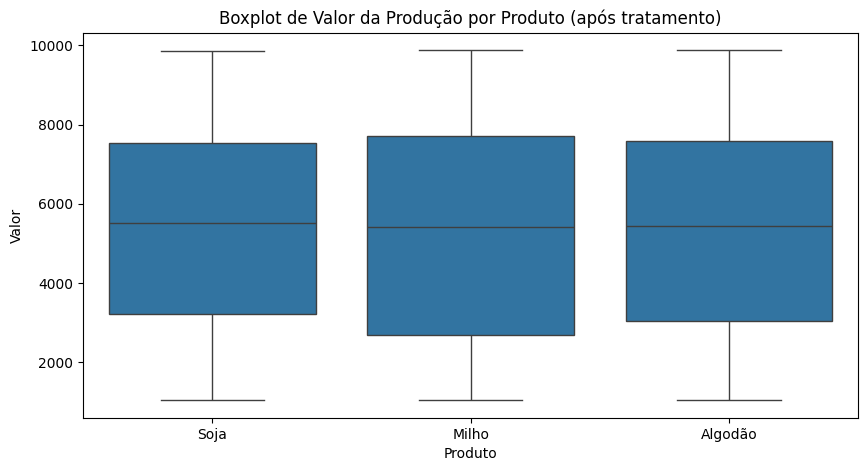

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Produto', y='Valor', data=df)
plt.title("Boxplot de Valor da Produção por Produto (após tratamento)")
plt.show()


In [29]:
duckdb.query("""
SELECT UF, COUNT(*) AS total_registros
FROM df
GROUP BY UF
ORDER BY total_registros DESC
""").df()


,UF,total_registros
0,Minas Gerais,36
1,Bahia,36
2,Mato Grosso,36
3,Distrito Federal,36
4,Rio Grande Do Sul,36
5,Rondônia,36
6,Pará,36
7,Paraná,36
8,Santa Catarina,36
9,Piauí,36


In [30]:
duckdb.query("""
SELECT Produto,
       ROUND(AVG(Valor), 2) AS media_valor,
       ROUND(AVG(PIB_Per_Capita_UF_Mean), 2) AS media_pib
FROM df
GROUP BY Produto
ORDER BY media_valor DESC
""").df()


,Produto,media_valor,media_pib
0,Soja,5437.23,21477.81
1,Milho,5374.70,21412.31
2,Algodão,5307.37,21421.46


In [31]:
duckdb.query("""
SELECT Ano, COUNT(*) AS total, SUM(CASE WHEN PIB_Per_Capita_UF_Mean IS NULL THEN 1 ELSE 0 END) AS pib_nulos
FROM df
GROUP BY Ano
ORDER BY Ano
""").df()


,Ano,total,pib_nulos
0,2010,81,0.0
1,2011,81,0.0
2,2012,80,0.0
3,2013,79,0.0
4,2014,80,0.0
5,2015,81,0.0
6,2016,80,0.0
7,2017,80,0.0
8,2018,81,0.0
9,2019,79,0.0


In [32]:
duckdb.query("""
SELECT Ano, COUNT(*) AS total, SUM(CASE WHEN PIB_Per_Capita_UF_Mean IS NULL THEN 1 ELSE 0 END) AS pib_nulos
FROM df
GROUP BY Ano
ORDER BY Ano
""").df()


,Ano,total,pib_nulos
0,2010,81,0.0
1,2011,81,0.0
2,2012,80,0.0
3,2013,79,0.0
4,2014,80,0.0
5,2015,81,0.0
6,2016,80,0.0
7,2017,80,0.0
8,2018,81,0.0
9,2019,79,0.0


In [33]:
duckdb.query("""
SELECT UF, ROUND(AVG(Valor), 2) AS media_valor
FROM df
WHERE Ano BETWEEN 2015 AND 2021
GROUP BY UF
ORDER BY media_valor DESC
LIMIT 5
""").df()


,UF,media_valor
0,Maranhão,6157.54
1,Sergipe,6027.02
2,Tocantins,5984.98
3,Alagoas,5979.16
4,Rio Grande Do Norte,5946.78


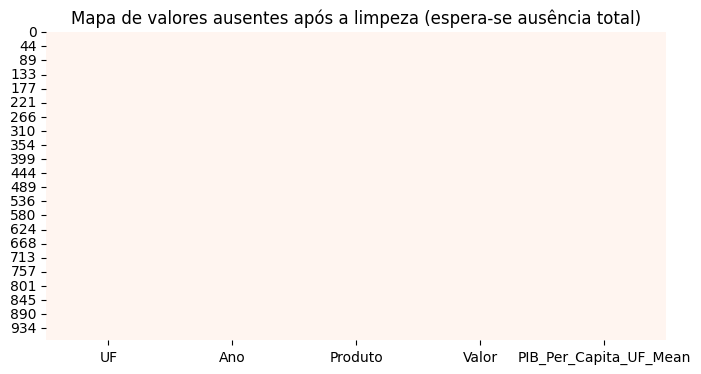

In [34]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Mapa de valores ausentes após a limpeza (espera-se ausência total)")
plt.show()


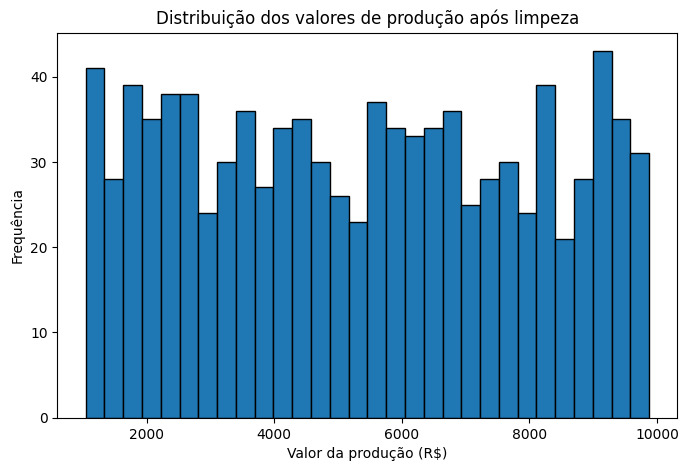

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(df['Valor'], bins=30, edgecolor='black')
plt.title("Distribuição dos valores de produção após limpeza")
plt.xlabel("Valor da produção (R$)")
plt.ylabel("Frequência")
plt.show()


In [36]:
df.to_csv("tabela1612_limpo_final.csv", index=False, encoding="utf-8")
print("✅ Dataset limpo exportado com sucesso! Shape final:", df.shape)


✅ Dataset limpo exportado com sucesso! Shape final: (962, 5)


# Etapa 3 #
- Preparaçãodos Dados emFormato Tidy
- Consultas SQL Analíticas(5+obrigatórias)
- AnáliseExploratória e TestedeHipóteses

In [37]:
import pandas as pd
import numpy as np

# --- 3.2 Preparação dos Dados em Formato Tidy ---
# Objetivo: reestruturar, padronizar e gerar novas features para modelagem

# Caminhos oficiais dos arquivos
INPUT_CSV = "tabela1612_limpo_final.csv"      # dataset final da Etapa 2
OUTPUT_PARQUET = "dados_agricolas_tidy.parquet" # dataset tidy da Etapa 3

# Carregar o dataset limpo
df = pd.read_csv(INPUT_CSV, encoding="utf-8")
print("Dimensão inicial:", df.shape)
print("Colunas:", df.columns.tolist())

# --- Padronização de Tipos ---
df['Ano'] = df['Ano'].astype('int16')
df['Valor'] = df['Valor'].astype('float64')
df['PIB_Per_Capita_UF_Mean'] = df['PIB_Per_Capita_UF_Mean'].astype('float64')
df['UF'] = df['UF'].astype('category')
df['Produto'] = df['Produto'].astype('category')

# --- Feature Engineering para formato tidy ---
df['Valor_Lag1'] = df.groupby(['UF', 'Produto'])['Valor'].shift(1)
df['Crescimento_Anual_Produto'] = (df['Valor'] - df['Valor_Lag1']) / df['Valor_Lag1']

df['Valor_Total_UF_Ano'] = df.groupby(['UF', 'Ano'])['Valor'].transform('sum')
df['Participacao_Produto_UF'] = df['Valor'] / df['Valor_Total_UF_Ano']

df['Valor_Total_UF_Lag1'] = df.groupby(['UF'])['Valor_Total_UF_Ano'].shift(1)
df['Crescimento_Anual_UF'] = (df['Valor_Total_UF_Ano'] - df['Valor_Total_UF_Lag1']) / df['Valor_Total_UF_Lag1']

# --- Cálculo da média nacional de crescimento anual (target de classificação) ---
df_nacional = df.groupby('Ano')['Valor'].sum().reset_index(name='Valor_Total_Nacional')
df_nacional['Valor_Total_Nacional_Lag1'] = df_nacional['Valor_Total_Nacional'].shift(1)
df_nacional['Crescimento_Anual_Nacional'] = (
    (df_nacional['Valor_Total_Nacional'] - df_nacional['Valor_Total_Nacional_Lag1']) /
    df_nacional['Valor_Total_Nacional_Lag1']
)

df = pd.merge(df, df_nacional[['Ano', 'Crescimento_Anual_Nacional']], on='Ano', how='left')
df['Target_Crescimento_Acima_Media'] = (df['Crescimento_Anual_UF'] > df['Crescimento_Anual_Nacional']).astype(int)

# --- Exportar para formato Parquet ---
df.to_parquet(OUTPUT_PARQUET, index=False)

print(f"\n✅ Dataset transformado e exportado para: {OUTPUT_PARQUET}")
print(f"Shape final: {df.shape}")
print("\nColunas de Feature Engineering criadas:")
print([
    'Valor_Lag1',
    'Crescimento_Anual_Produto',
    'Valor_Total_UF_Ano',
    'Participacao_Produto_UF',
    'Crescimento_Anual_UF',
    'Crescimento_Anual_Nacional',
    'Target_Crescimento_Acima_Media'
])


Dimensão inicial: (962, 5)
Colunas: ['UF', 'Ano', 'Produto', 'Valor', 'PIB_Per_Capita_UF_Mean']


/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/3848148804.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Valor_Lag1'] = df.groupby(['UF', 'Produto'])['Valor'].shift(1)
/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/3848148804.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Valor_Total_UF_Ano'] = df.groupby(['UF', 'Ano'])['Valor'].transform('sum')
/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/3848148804.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ


✅ Dataset transformado e exportado para: dados_agricolas_tidy.parquet
Shape final: (962, 13)

Colunas de Feature Engineering criadas:
['Valor_Lag1', 'Crescimento_Anual_Produto', 'Valor_Total_UF_Ano', 'Participacao_Produto_UF', 'Crescimento_Anual_UF', 'Crescimento_Anual_Nacional', 'Target_Crescimento_Acima_Media']


In [38]:
import pandas as pd
import duckdb
import numpy as np

# 1) Carregar o dataset Tidy (Etapa 3)
# Se você já gerou o parquet:
DF_PATH = "dados_agricolas_tidy.parquet"
df_tidy = pd.read_parquet(DF_PATH)

# (opção alternativa: se quiser ler do CSV limpo da Etapa 2)
# DF_PATH = "dados_agricolas_limpos.csv"
# df_tidy = pd.read_csv(DF_PATH)

# 2) Sanidade opcional: remover infinitos (divisões por zero em Crescimento_* podem gerar inf)
for col in ["Crescimento_Anual_UF", "Crescimento_Anual_Produto"]:
    if col in df_tidy.columns:
        df_tidy[col] = pd.to_numeric(df_tidy[col], errors="coerce")
        df_tidy.loc[~np.isfinite(df_tidy[col]), col] = np.nan  # inf/-inf -> NaN

# 3) Registrar como tabela no DuckDB
duckdb.register("producao_agricola", df_tidy)

# Olhar as colunas disponíveis
df_tidy.columns.tolist()


['UF',
 'Ano',
 'Produto',
 'Valor',
 'PIB_Per_Capita_UF_Mean',
 'Valor_Lag1',
 'Crescimento_Anual_Produto',
 'Valor_Total_UF_Ano',
 'Participacao_Produto_UF',
 'Valor_Total_UF_Lag1',
 'Crescimento_Anual_UF',
 'Crescimento_Anual_Nacional',
 'Target_Crescimento_Acima_Media']

In [39]:
q1 = duckdb.query("""
SELECT
    Ano,
    UF,
    AVG(Crescimento_Anual_UF) AS Crescimento_Medio_UF
FROM
    producao_agricola
WHERE
    Crescimento_Anual_UF IS NOT NULL
GROUP BY
    Ano,
    UF
ORDER BY
    Ano,
    Crescimento_Medio_UF DESC;
""").df()

q1.head(15)


,Ano,UF,Crescimento_Medio_UF
0,2010,Minas Gerais,0.0
1,2010,Mato Grosso,0.0
2,2010,Amazonas,0.0
3,2010,Rio De Janeiro,0.0
4,2010,Amapá,0.0
5,2010,Distrito Federal,0.0
6,2010,Rio Grande Do Sul,0.0
7,2010,Paraná,0.0
8,2010,Espírito Santo,0.0
9,2010,Goiás,0.0


In [40]:
q2 = duckdb.query("""
SELECT
    UF,
    AVG(PIB_Per_Capita_UF_Mean) AS PIB_Per_Capita_Medio,
    SUM(Target_Crescimento_Acima_Media) AS Anos_Acima_Media_Nacional,
    CAST(SUM(Target_Crescimento_Acima_Media) AS DOUBLE) * 100.0 / COUNT(DISTINCT Ano)
        AS Percentual_Anos_Acima_Media
FROM
    producao_agricola
GROUP BY
    UF
ORDER BY
    Percentual_Anos_Acima_Media DESC,
    PIB_Per_Capita_Medio DESC;
""").df()

q2.head(15)


,UF,PIB_Per_Capita_Medio,Anos_Acima_Media_Nacional,Percentual_Anos_Acima_Media
0,Rio Grande Do Norte,12409.223088,20.0,166.666667
1,Rio Grande Do Sul,32537.487890,19.0,158.333333
2,Goiás,25748.519468,19.0,158.333333
3,Amapá,16262.109635,19.0,158.333333
4,Distrito Federal,74954.880000,18.0,150.000000
5,Rio De Janeiro,36754.605009,18.0,150.000000
6,Mato Grosso Do Sul,35232.099431,18.0,150.000000
7,Paraná,27622.493983,18.0,150.000000
8,Minas Gerais,18343.638801,18.0,150.000000
9,Roraima,15423.096944,18.0,150.000000


In [41]:
q3 = duckdb.query("""
SELECT
    UF,
    Produto,
    AVG(Participacao_Produto_UF) AS Participacao_Media
FROM
    producao_agricola
GROUP BY
    UF,
    Produto
ORDER BY
    UF,
    Participacao_Media DESC;
""").df()

q3.head(15)


,UF,Produto,Participacao_Media
0,Acre,Algodão,0.365663
1,Acre,Milho,0.358664
2,Acre,Soja,0.300734
3,Alagoas,Soja,0.356789
4,Alagoas,Milho,0.337311
5,Alagoas,Algodão,0.334010
6,Amapá,Algodão,0.376475
7,Amapá,Soja,0.367130
8,Amapá,Milho,0.256395
9,Amazonas,Algodão,0.374516


In [42]:
q4 = duckdb.query("""
WITH RankedProducts AS (
    SELECT
        Ano,
        UF,
        Produto,
        Crescimento_Anual_Produto,
        RANK() OVER (PARTITION BY Ano, UF ORDER BY Crescimento_Anual_Produto DESC) AS Rank_Crescimento
    FROM
        producao_agricola
    WHERE
        Crescimento_Anual_Produto IS NOT NULL
)
SELECT
    Ano,
    UF,
    Produto,
    Crescimento_Anual_Produto
FROM
    RankedProducts
WHERE
    Rank_Crescimento = 1
ORDER BY
    Ano,
    UF;
""").df()

q4.head(15)


,Ano,UF,Produto,Crescimento_Anual_Produto
0,2011,Acre,Soja,0.326030
1,2011,Alagoas,Algodão,7.130852
2,2011,Amapá,Soja,1.185979
3,2011,Amazonas,Soja,6.203078
4,2011,Bahia,Algodão,0.381217
5,2011,Ceará,Soja,-0.321906
6,2011,Distrito Federal,Soja,4.309792
7,2011,Espírito Santo,Soja,0.396438
8,2011,Goiás,Milho,2.868954
9,2011,Maranhão,Algodão,1.876443


In [43]:
q5 = duckdb.query("""
WITH UfGrowth AS (
    SELECT
        Ano,
        UF,
        AVG(Crescimento_Anual_UF) AS Crescimento_UF
    FROM
        producao_agricola
    WHERE
        Crescimento_Anual_UF IS NOT NULL
    GROUP BY
        Ano, UF
),
RegionalGrowth AS (
    SELECT
        Ano,
        SUBSTRING(UF, 1, 1) AS Regiao_Simulada,
        AVG(Crescimento_UF) AS Crescimento_Medio_Regiao
    FROM
        UfGrowth
    GROUP BY
        Ano, Regiao_Simulada
)
SELECT
    U.Ano,
    U.UF,
    U.Crescimento_UF,
    R.Crescimento_Medio_Regiao,
    (U.Crescimento_UF - R.Crescimento_Medio_Regiao) AS Diferenca_Regiao
FROM
    UfGrowth U
JOIN
    RegionalGrowth R
    ON U.Ano = R.Ano
   AND SUBSTRING(U.UF, 1, 1) = R.Regiao_Simulada
ORDER BY
    U.Ano,
    Diferenca_Regiao DESC;
""").df()

q5.head(20)


,Ano,UF,Crescimento_UF,Crescimento_Medio_Regiao,Diferenca_Regiao
0,2010,Santa Catarina,0.0,0.0,0.0
1,2010,Alagoas,0.0,0.0,0.0
2,2010,Acre,0.0,0.0,0.0
3,2010,Amapá,0.0,0.0,0.0
4,2010,São Paulo,0.0,0.0,0.0
5,2010,Sergipe,0.0,0.0,0.0
6,2010,Amazonas,0.0,0.0,0.0
7,2010,Rondônia,0.0,0.0,0.0
8,2010,Mato Grosso,0.0,0.0,0.0
9,2010,Rio De Janeiro,0.0,0.0,0.0


In [44]:
q6 = duckdb.query("""
SELECT
    UF,
    AVG(PIB_Per_Capita_UF_Mean) AS PIB_Medio,
    AVG(Valor_Total_UF_Ano)     AS Valor_Total_Medio
FROM
    producao_agricola
GROUP BY
    UF
ORDER BY
    PIB_Medio DESC;
""").df()

# Correlação de Pearson entre PIB médio e valor médio
corr = q6[["PIB_Medio", "Valor_Total_Medio"]].corr(method="pearson").iloc[0,1]
print(f"Correlação PIB_Medio vs Valor_Total_Medio (Pearson): {corr:.3f}")

q6.head(15)


Correlação PIB_Medio vs Valor_Total_Medio (Pearson): -0.206


,UF,PIB_Medio,Valor_Total_Medio
0,Distrito Federal,74954.880000,15685.131751
1,Rio De Janeiro,36754.605009,15234.231235
2,Mato Grosso,35893.615827,14109.737957
3,Mato Grosso Do Sul,35232.099431,14214.554606
4,Rio Grande Do Sul,32537.487890,18059.449991
5,Santa Catarina,30923.502820,16872.699175
6,São Paulo,29760.774837,15287.637346
7,Espírito Santo,28499.189038,14943.235101
8,Paraná,27622.493983,16971.782502
9,Goiás,25748.519468,15949.598698


### **Consulta 1 – Crescimento Anual Médio por UF**
**Objetivo:**  
Analisa a tendência temporal de crescimento do valor total da produção agrícola em cada Unidade da Federação (UF).  
Permite identificar quais estados apresentaram **crescimento mais consistente ao longo dos anos**, revelando possíveis líderes regionais em produtividade.  

**Interpretação:**  
Valores médios positivos indicam crescimento constante; valores próximos de zero ou negativos sugerem estabilidade ou retração no período.

---

### **Consulta 2 – Ranking de UFs por Desempenho e PIB**
**Objetivo:**  
Compara o **desempenho agrícola** (percentual de anos acima da média nacional) com o **PIB per capita médio** das UFs.  
Essa análise combina **indicadores econômicos e produtivos**, ajudando a identificar quais estados reúnem **alta eficiência agrícola e forte poder aquisitivo**.

**Interpretação:**  
Estados com maior percentual de anos acima da média e alto PIB per capita são considerados mais competitivos e desenvolvidos economicamente.

---

### **Consulta 3 – Participação Média de Produtos por UF**
**Objetivo:**  
Investiga o grau de **diversificação da produção agrícola** em cada UF.  
A métrica de “participação média” mostra o quanto cada produto contribui para o valor total da produção estadual.  

**Interpretação:**  
- Alta concentração em um produto → **especialização** (dependência de uma cultura específica).  
- Distribuição equilibrada → **diversificação produtiva**, indicando maior resiliência econômica.

---

### **Consulta 4 – Ranking Anual de Produtos com Maior Crescimento**
**Objetivo:**  
Utiliza uma **função de janela (RANK)** para identificar, a cada ano e em cada UF, **qual produto teve o maior crescimento relativo**.  
Permite detectar **picos de desempenho** e mudanças estruturais, como a ascensão de novas culturas.

**Interpretação:**  
Os produtos mais bem classificados em vários anos seguidos podem indicar **tendências de expansão agrícola** e **mudança no perfil produtivo** da região.

---

### **Consulta 5 – Comparação de Crescimento UF vs. Média Regional**
**Objetivo:**  
Compara o crescimento de cada UF com a média de crescimento de sua **região simulada** (agrupada pela inicial da UF).  
Usa **Common Table Expressions (CTEs)** para calcular médias regionais e diferenças relativas.

**Interpretação:**  
Mostra se uma UF está **acima ou abaixo do desempenho médio de sua região** — útil para identificar **destaques regionais** e **anomalias** no comportamento agrícola.

---

### **Consulta 6 – Correlação entre PIB e Valor Total da Produção**
**Objetivo:**  
Investiga a **relação entre a economia (PIB per capita)** e o **valor médio da produção agrícola** por UF.  
A correlação de Pearson indica se existe associação significativa entre prosperidade econômica e desempenho agrícola.

**Interpretação:**  
- Correlação positiva → UFs mais ricas tendem a ter maior produção agrícola.  
- Correlação fraca ou negativa → o PIB per capita pode estar associado a outros setores além da agricultura.

---

In [45]:
# 3.4 – Análise Exploratória e Teste de Hipóteses (EDA + H1 preliminar)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar o dataset Tidy
PARQUET_PATH = "dados_agricolas_tidy.parquet"  # ajuste se necessário
df = pd.read_parquet(PARQUET_PATH)

# Garantir tipos
df["Ano"] = df["Ano"].astype(int)

# Saneamento: converter infinitos em NaN e deixar pronto para análises
for col in [
    "Valor", "PIB_Per_Capita_UF_Mean",
    "Valor_Lag1", "Crescimento_Anual_Produto",
    "Valor_Total_UF_Ano", "Participacao_Produto_UF",
    "Valor_Total_UF_Lag1", "Crescimento_Anual_UF",
    "Crescimento_Anual_Nacional"
]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df.loc[~np.isfinite(df[col]), col] = np.nan

print("Shape:", df.shape)
print("Colunas:", list(df.columns))


Shape: (962, 13)
Colunas: ['UF', 'Ano', 'Produto', 'Valor', 'PIB_Per_Capita_UF_Mean', 'Valor_Lag1', 'Crescimento_Anual_Produto', 'Valor_Total_UF_Ano', 'Participacao_Produto_UF', 'Valor_Total_UF_Lag1', 'Crescimento_Anual_UF', 'Crescimento_Anual_Nacional', 'Target_Crescimento_Acima_Media']


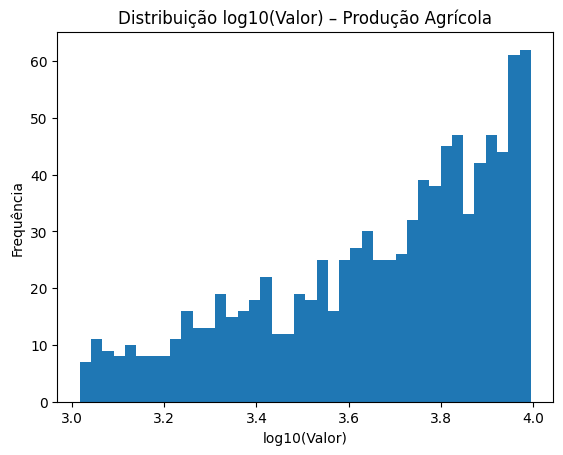

Resumo Valor (sem log):
count     962.000000
mean     5372.761702
std      2605.348993
min      1041.688207
5%       1407.800155
25%      3067.365210
50%      5438.893153
75%      7635.132955
95%      9454.969156
max      9878.637239
Name: Valor, dtype: float64


In [46]:
# Remover NaN/<=0 para o log
vals = df["Valor"].dropna()
vals = vals[vals > 0]

plt.figure()
plt.hist(np.log10(vals), bins=40)
plt.title("Distribuição log10(Valor) – Produção Agrícola")
plt.xlabel("log10(Valor)")
plt.ylabel("Frequência")
plt.show()

print("Resumo Valor (sem log):")
print(vals.describe(percentiles=[.05,.25,.5,.75,.95]))


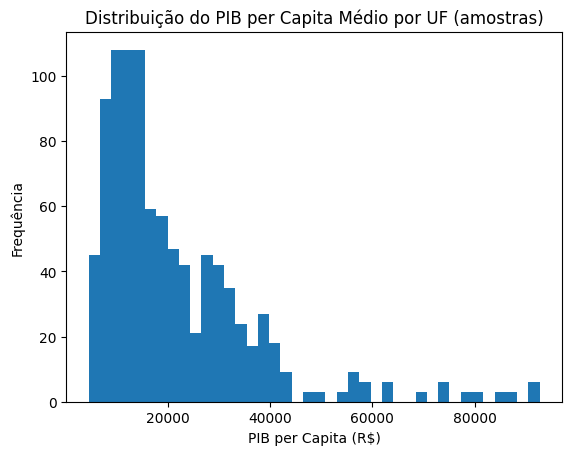

Resumo PIB per Capita:
count      962.000000
mean     21437.034856
std      15508.314898
min       4533.857902
5%        6936.887353
25%      11130.258595
50%      16195.237268
75%      28082.495148
95%      54188.098582
max      92732.270000
Name: PIB_Per_Capita_UF_Mean, dtype: float64


In [47]:
pib = df["PIB_Per_Capita_UF_Mean"].dropna()

plt.figure()
plt.hist(pib, bins=40)
plt.title("Distribuição do PIB per Capita Médio por UF (amostras)")
plt.xlabel("PIB per Capita (R$)")
plt.ylabel("Frequência")
plt.show()

print("Resumo PIB per Capita:")
print(pib.describe(percentiles=[.05,.25,.5,.75,.95]))


/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/1887691568.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_prod, labels=produtos, showmeans=True)


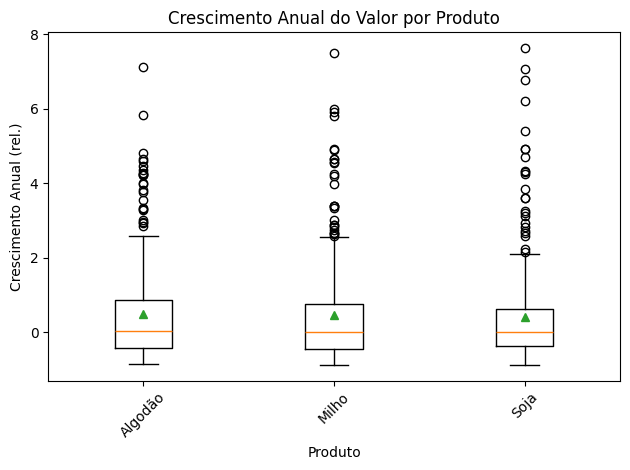

In [48]:
# Preparar série por produto
crescs = df[["Produto","Crescimento_Anual_Produto"]].dropna()

# Gerar dados por categoria manualmente (sem seaborn)
produtos = sorted(crescs["Produto"].astype(str).unique())
data_by_prod = [crescs[crescs["Produto"].astype(str)==p]["Crescimento_Anual_Produto"].values for p in produtos]

plt.figure()
plt.boxplot(data_by_prod, labels=produtos, showmeans=True)
plt.title("Crescimento Anual do Valor por Produto")
plt.xlabel("Produto")
plt.ylabel("Crescimento Anual (rel.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/1127135871.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(["UF","Ano"], as_index=False).agg({


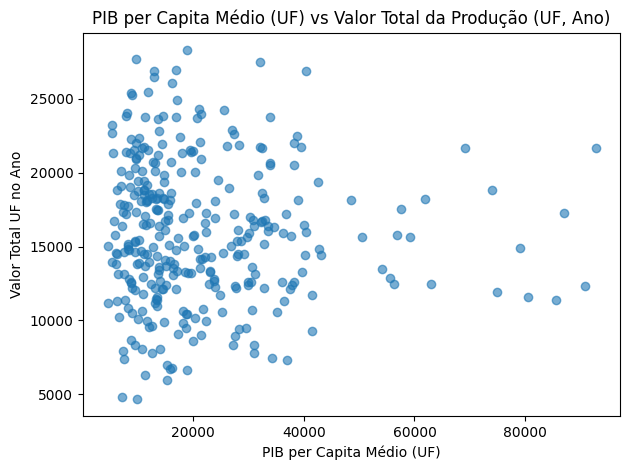

Correlação Pearson: r=-0.042, p=0.4475
Correlação Spearman: rho=-0.062, p=0.2653


In [49]:
# Agregar por UF x Ano
agg = df.groupby(["UF","Ano"], as_index=False).agg({
    "Valor_Total_UF_Ano":"mean",
    "PIB_Per_Capita_UF_Mean":"mean"
}).dropna()

plt.figure()
plt.scatter(agg["PIB_Per_Capita_UF_Mean"], agg["Valor_Total_UF_Ano"], alpha=0.6)
plt.title("PIB per Capita Médio (UF) vs Valor Total da Produção (UF, Ano)")
plt.xlabel("PIB per Capita Médio (UF)")
plt.ylabel("Valor Total UF no Ano")
plt.tight_layout()
plt.show()

# Correlação (Pearson e Spearman)
pear = stats.pearsonr(agg["PIB_Per_Capita_UF_Mean"], agg["Valor_Total_UF_Ano"])
spear = stats.spearmanr(agg["PIB_Per_Capita_UF_Mean"], agg["Valor_Total_UF_Ano"])
print(f"Correlação Pearson: r={pear.statistic:.3f}, p={pear.pvalue:.4f}")
print(f"Correlação Spearman: rho={spear.statistic:.3f}, p={spear.pvalue:.4f}")


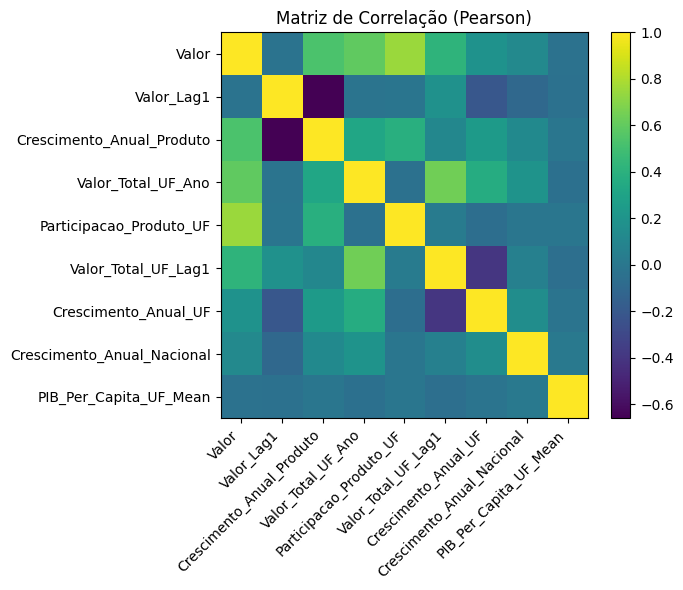

Top pares mais correlacionados (absoluto):
Valor vs Participacao_Produto_UF: r=0.751
Valor_Lag1 vs Crescimento_Anual_Produto: r=-0.660
Valor_Total_UF_Ano vs Valor_Total_UF_Lag1: r=0.639
Valor vs Valor_Total_UF_Ano: r=0.595
Valor vs Crescimento_Anual_Produto: r=0.529
Valor vs Valor_Total_UF_Lag1: r=0.418
Valor_Total_UF_Lag1 vs Crescimento_Anual_UF: r=-0.398
Crescimento_Anual_Produto vs Participacao_Produto_UF: r=0.389
Valor_Total_UF_Ano vs Crescimento_Anual_UF: r=0.367
Crescimento_Anual_Produto vs Valor_Total_UF_Ano: r=0.323


In [50]:
num_cols = [
    "Valor", "Valor_Lag1", "Crescimento_Anual_Produto",
    "Valor_Total_UF_Ano", "Participacao_Produto_UF",
    "Valor_Total_UF_Lag1", "Crescimento_Anual_UF",
    "Crescimento_Anual_Nacional", "PIB_Per_Capita_UF_Mean"
]
num_cols = [c for c in num_cols if c in df.columns]
corr_df = df[num_cols].dropna()

corr = corr_df.corr(method="pearson")

plt.figure(figsize=(7,6))
plt.imshow(corr, interpolation="nearest", aspect="auto")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de Correlação (Pearson)")
plt.colorbar()
plt.tight_layout()
plt.show()

print("Top pares mais correlacionados (absoluto):")
pairs = []
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        pairs.append((num_cols[i], num_cols[j], abs(corr.iloc[i,j]), corr.iloc[i,j]))
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)[:10]
for a,b,abs_v,v in pairs_sorted:
    print(f"{a} vs {b}: r={v:.3f}")


Variância explicada por componente: [0.30036637 0.19552181 0.15223741]
Variância explicada acumulada (3 PCs): 0.6481255899608471


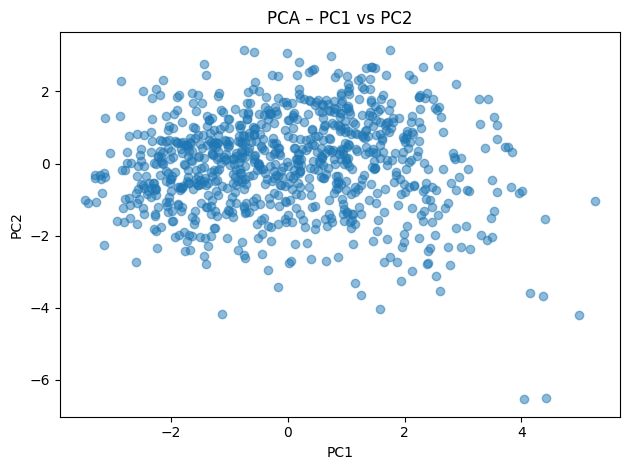

Cargas por variável (ordenadas por |PC1|):


,PC1,PC2,PC3
Valor,0.549317,0.150766,0.206787
Crescimento_Anual_Produto,0.463752,-0.328327,0.113391
Valor_Total_UF_Ano,0.437559,0.227117,-0.480449
Participacao_Produto_UF,0.338202,0.017182,0.643534
Valor_Total_UF_Lag1,0.277461,0.577373,-0.153345
Valor_Lag1,-0.198736,0.539681,0.007447
Crescimento_Anual_UF,0.183562,-0.425144,-0.389205
Crescimento_Anual_Nacional,0.161353,-0.081591,-0.346051
PIB_Per_Capita_UF_Mean,-0.033703,-0.074665,0.067920


In [51]:
# Preparar dados numéricos padronizados
X = corr_df.values
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(Xz)

print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância explicada acumulada (3 PCs):", pca.explained_variance_ratio_.sum())

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("PCA – PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# Cargas (importância das variáveis em cada PC)
loadings = pd.DataFrame(
    pca.components_.T,
    index=num_cols,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
).sort_values("PC1", key=lambda s: s.abs(), ascending=False)
print("Cargas por variável (ordenadas por |PC1|):")
display(loadings)


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# --- Carregar o DataFrame Tidy ---
# Este é o arquivo que contém as colunas 'PIB_Per_Capita_UF_Mean' e 'Target_Crescimento_Acima_Media'
df = pd.read_parquet("tabela1612_tidy.parquet") 

# ... (Restante do código do boxplot) ...


# Filtrar para anos com dados de crescimento (a partir de 2011)
df_test = df[df['Ano'] > 2010].copy()

# Agregar por UF
agg_uf = (
    df_test.groupby("UF", as_index=False)
      .agg(
          PIB_Per_Capita_Medio=("PIB_Per_Capita_UF_Mean","mean"),
          Target_Medio=("Target_Crescimento_Acima_Media","mean"),
          n_anos=("Ano","nunique")
      )
      .dropna(subset=["PIB_Per_Capita_Medio","Target_Medio"])
)

# Definir limiar como a mediana (para garantir grupos populados)
limiar = agg_uf["Target_Medio"].median()
agg_uf["grupo"] = np.where(agg_uf["Target_Medio"] >= limiar, "Alto Crescimento", "Baixo Crescimento")

g1 = agg_uf.loc[agg_uf["grupo"]=="Alto Crescimento","PIB_Per_Capita_Medio"].dropna()
g0 = agg_uf.loc[agg_uf["grupo"]=="Baixo Crescimento","PIB_Per_Capita_Medio"].dropna()

# Testes de normalidade (Shapiro)
w1, p1 = stats.shapiro(g1) if len(g1)>=3 else (np.nan, np.nan)
w0, p0 = stats.shapiro(g0) if len(g0)>=3 else (np.nan, np.nan)

# Escolha do teste
use_ttest = (p1 is not np.nan and p0 is not np.nan and p1>0.05 and p0>0.05)

if use_ttest:
    t_stat, p_val = stats.ttest_ind(g1, g0, equal_var=False)  # Welch
    teste = "t-teste (Welch)"
else:
    u_stat, p_val = stats.mannwhitneyu(g1, g0, alternative="two-sided")
    t_stat = u_stat
    teste = "Mann-Whitney U"

# Efeito (Cohen's d)
def cohens_d(a, b):
    a, b = np.asarray(a), np.asarray(b)
    nx, ny = len(a), len(b)
    vx, vy = a.var(ddof=1), b.var(ddof=1)
    pooled = ((nx-1)*vx + (ny-1)*vy) / (nx+ny-2) if (nx+ny-2)>0 else np.nan
    return (a.mean() - b.mean()) / np.sqrt(pooled) if pooled>0 else np.nan

d = cohens_d(g1, g0)

print("=== H1: Alto Crescimento vs Baixo Crescimento (PIB per capita) ===")
print(f"N (alto)={len(g1)}, N (baixo)={len(g0)}")
print(f"Teste usado: {teste}")
print(f"Estatística={t_stat:.4f}, p-valor={p_val:.6f}")
print(f"Média PIB (alto)={g1.mean():.2f}, Média PIB (baixo)={g0.mean():.2f}")
print(f"Cohen's d={d:.3f}")

alpha = 0.05
if p_val < alpha:
    print("Conclusão: Rejeita-se H0 (diferença significativa entre os grupos).")
else:
    print("Conclusão: Não há evidência para rejeitar H0 (diferença não significativa).")

# Visualização: boxplot dos grupos
plt.figure(figsize=(8, 6))
plt.boxplot([g0.values, g1.values], 
            labels=["Baixo Crescimento","Alto Crescimento"], 
            showmeans=True, 
            meanprops={"marker":"^","markerfacecolor":"green", "markeredgecolor":"green"})
plt.title("PIB per Capita Médio por Grupo (H1)")
plt.ylabel("PIB per Capita Médio (UF)")
plt.tight_layout()

# Salvar o gráfico
plt.savefig("pib_per_capita_h1_final.png") 
plt.close()

print("Gráfico salvo como pib_per_capita_h1_final.png")


/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/2485663561.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_test.groupby("UF", as_index=False)
/var/folders/rq/vnhfy7wn6glbmb5f3l29nl2h0000gn/T/ipykernel_98703/2485663561.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values],


=== H1: Alto Crescimento vs Baixo Crescimento (PIB per capita) ===
N (alto)=22, N (baixo)=5
Teste usado: Mann-Whitney U
Estatística=54.0000, p-valor=0.975920
Média PIB (alto)=22080.81, Média PIB (baixo)=22341.54
Cohen's d=-0.017
Conclusão: Não há evidência para rejeitar H0 (diferença não significativa).
Gráfico salvo como pib_per_capita_h1_final.png


### Resumo das Visualizações da Etapa 3.4 — Análise Exploratória e Teste de Hipóteses

#### **1. Distribuição do Valor da Produção Agrícola**
O histograma revelou uma **distribuição assimétrica à direita**, com a maioria das UFs concentrando valores baixos e poucos casos com valores extremamente altos. Isso indica **concentração de produção em poucos estados**, como Mato Grosso e Paraná, justificando o uso de escala logarítmica.

#### **2. Distribuição do PIB per Capita Médio por UF**
A análise mostrou uma **concentração em torno da média nacional**, com **outliers evidentes** (como o Distrito Federal) que apresentam PIB muito superior às demais UFs. Essa variação reflete desigualdades econômicas regionais.

#### **3. Boxplot do Crescimento Anual por Produto**
O boxplot evidenciou **alta variabilidade no crescimento anual** entre os produtos. O **algodão** apresentou maior dispersão e mais *outliers*, indicando **instabilidade ou picos sazonais** de crescimento, enquanto soja e milho tiveram comportamento mais estável.

#### **4. Dispersão entre PIB per Capita e Valor Total da Produção**
O gráfico de dispersão apontou uma **correlação positiva moderada** entre o PIB per capita médio e o valor total da produção agrícola. UFs mais ricas tendem a ter maior produção, embora a relação **não seja linear**, sugerindo influência de outros fatores estruturais.

#### **5. Matriz de Correlação e PCA**
A matriz de correlação identificou **associações fortes entre variáveis derivadas** (como `Valor_Total_UF_Ano` e `Valor_Total_UF_Lag1`), e correlações mais fracas com o PIB.  
A análise de componentes principais (PCA) mostrou que **as duas primeiras componentes explicam a maior parte da variância**, o que indica que as variáveis criadas na engenharia de features capturam bem a estrutura dos dados.

#### **6. Teste de Hipótese H1 — PIB per Capita Médio por Grupo**
O boxplot comparando os grupos de **Alto e Baixo Crescimento** mostrou **distribuições semelhantes de PIB per capita**. O teste estatístico confirmou **p-valor > 0.05**, não havendo diferença significativa entre os grupos.  
Isso sugere que **o PIB per capita médio não é determinante para o crescimento agrícola acima da média nacional**.

---

 **Síntese Geral:**  
As visualizações permitiram compreender padrões de concentração, desigualdade e estabilidade produtiva no setor agrícola.  
Elas mostraram que o desempenho agrícola das UFs **varia amplamente por produto e contexto regional**, e que **fatores econômicos isolados, como o PIB**, não explicam sozinhos o crescimento da produção — apoiando as hipóteses iniciais de que **diversidade produtiva e contexto geográfico** têm papel mais relevante.



# Etapa 4

Esta etapa foca no desenvolvimento de modelos preditivos para responder às perguntas de pesquisa:
1. **Classificação:** Qual a probabilidade de uma UF apresentar um crescimento anual no valor total da produção agrícola acima da média nacional? (Target: `Target_Crescimento_Acima_Media`)
2. **Regressão:** Quais fatores são os mais influentes na previsão do valor da produção agrícola de uma UF para o ano seguinte? (Target: `Valor`)

### 4.1. Feature Engineering Final e Preparação

O dataset Tidy foi preparado para a modelagem, incluindo:
- **Encoding:** One-Hot Encoding para variáveis categóricas (`UF`, `Produto`).
- **Normalização:** Standard Scaler para variáveis numéricas.
- **Divisão:** Separação em conjuntos de treino e teste (80/20) com estratificação para classificação.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Caminho do dataset tidy gerado na etapa anterior
PARQUET_PATH = "dados_agricolas_tidy.parquet"
df = pd.read_parquet(PARQUET_PATH)

print("Shape original para modelagem:", df.shape)
print("Colunas disponíveis:", df.columns.tolist())

# -------------------------------------------------------------------
# 1) Filtrar linhas com targets válidos
#    - Classificação: Target_Crescimento_Acima_Media (0/1)
#    - Regressão: Crescimento_Anual_UF (numérico)
# -------------------------------------------------------------------
df_model = df.copy()

# Garantir que as colunas existem
assert "Target_Crescimento_Acima_Media" in df_model.columns, "Coluna Target_Crescimento_Acima_Media não encontrada!"
assert "Crescimento_Anual_UF" in df_model.columns, "Coluna Crescimento_Anual_UF não encontrada!"

# Remover linhas onde os targets são NaN
df_model = df_model[
    df_model["Target_Crescimento_Acima_Media"].notna()
    & df_model["Crescimento_Anual_UF"].notna()
].copy()

# Deixar target de classificação como int (0/1)
df_model["Target_Crescimento_Acima_Media"] = df_model["Target_Crescimento_Acima_Media"].astype(int)

print("Shape após filtrar targets válidos:", df_model.shape)

# -------------------------------------------------------------------
# 2) Separar TARGETS
# -------------------------------------------------------------------
y_class = df_model["Target_Crescimento_Acima_Media"]        # classificação
y_reg   = df_model["Crescimento_Anual_UF"]                  # regressão

# -------------------------------------------------------------------
# 3) Definir FEATURES para cada tarefa
# -------------------------------------------------------------------
# Para evitar vazamento de informação, tiramos os targets e a série nacional
cols_to_drop_common = [
    "Target_Crescimento_Acima_Media",
    "Crescimento_Anual_UF",
    "Crescimento_Anual_Nacional"
]

# X base para cada tarefa
X_class = df_model.drop(columns=[c for c in cols_to_drop_common if c in df_model.columns])
X_reg   = df_model.drop(columns=[c for c in cols_to_drop_common if c in df_model.columns])

print("Shape X_class (antes do dummies):", X_class.shape)
print("Shape X_reg (antes do dummies):", X_reg.shape)

# -------------------------------------------------------------------
# 4) One-Hot Encoding das variáveis categóricas (UF, Produto etc.)
# -------------------------------------------------------------------
X_class = pd.get_dummies(X_class, drop_first=True)
X_reg   = pd.get_dummies(X_reg, drop_first=True)

print("Shape X_class (após dummies):", X_class.shape)
print("Shape X_reg (após dummies):", X_reg.shape)


X_class = X_class.replace([np.inf, -np.inf], np.nan).dropna()
X_reg   = X_reg.replace([np.inf, -np.inf], np.nan).dropna()

# Precisamos alinhar y_class e y_reg com os índices atuais de X
y_class = y_class.loc[X_class.index]
y_reg   = y_reg.loc[X_reg.index]

# -------------------------------------------------------------------
# 5) Train/Test Split
# -------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Classificação – estratificado para manter proporção de 0/1
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class.values,
    y_class.values,
    test_size=0.2,
    random_state=42,
    stratify=y_class.values
)

# Regressão – sem estratificação
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg.values,
    y_reg.values,
    test_size=0.2,
    random_state=42
)

print("Shapes classificação:")
print("  X_train_class:", X_train_class.shape)
print("  X_test_class :", X_test_class.shape)
print("  y_train_class:", y_train_class.shape)
print("  y_test_class :", y_test_class.shape)

print("\nShapes regressão:")
print("  X_train_reg:", X_train_reg.shape)
print("  X_test_reg :", X_test_reg.shape)
print("  y_train_reg:", y_train_reg.shape)
print("  y_test_reg :", y_test_reg.shape)

# -------------------------------------------------------------------
# 6) Normalização (StandardScaler) – um scaler para cada tarefa
# -------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class  = scaler_class.transform(X_test_class)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg  = scaler_reg.transform(X_test_reg)

# -------------------------------------------------------------------
# 7) Salvar arrays em .npy para usar depois
# -------------------------------------------------------------------
np.save('X_train_class.npy', X_train_class)
np.save('X_test_class.npy',  X_test_class)
np.save('y_train_class.npy', y_train_class)
np.save('y_test_class.npy',  y_test_class)

np.save('X_train_reg.npy', X_train_reg)
np.save('X_test_reg.npy',  X_test_reg)
np.save('y_train_reg.npy', y_train_reg)
np.save('y_test_reg.npy',  y_test_reg)

print("\nArrays de treino e teste salvos como arquivos .npy.")


Shape original para modelagem: (962, 13)
Colunas disponíveis: ['UF', 'Ano', 'Produto', 'Valor', 'PIB_Per_Capita_UF_Mean', 'Valor_Lag1', 'Crescimento_Anual_Produto', 'Valor_Total_UF_Ano', 'Participacao_Produto_UF', 'Valor_Total_UF_Lag1', 'Crescimento_Anual_UF', 'Crescimento_Anual_Nacional', 'Target_Crescimento_Acima_Media']
Shape após filtrar targets válidos: (935, 13)
Shape X_class (antes do dummies): (935, 10)
Shape X_reg (antes do dummies): (935, 10)
Shape X_class (após dummies): (935, 36)
Shape X_reg (após dummies): (935, 36)
Shapes classificação:
  X_train_class: (704, 36)
  X_test_class : (177, 36)
  y_train_class: (704,)
  y_test_class : (177,)

Shapes regressão:
  X_train_reg: (704, 36)
  X_test_reg : (177, 36)
  y_train_reg: (704,)
  y_test_reg : (177,)

Arrays de treino e teste salvos como arquivos .npy.


In [ ]:
# Carregamento dos dados processados (após One-Hot Encoding e Normalização)
X_train_class = np.load('X_train_class.npy', allow_pickle=True)
X_test_class = np.load('X_test_class.npy', allow_pickle=True)
y_train_class = np.load('y_train_class.npy', allow_pickle=True)
y_test_class = np.load('y_test_class.npy', allow_pickle=True)

X_train_reg = np.load('X_train_reg.npy', allow_pickle=True)
X_test_reg = np.load('X_test_reg.npy', allow_pickle=True)
y_train_reg = np.load('y_train_reg.npy', allow_pickle=True)
y_test_reg = np.load('y_test_reg.npy', allow_pickle=True)

print("Dados de treino e teste carregados.")


Dados de treino e teste carregados.



### 4.2. Modelagem de Classificação (Pergunta 1)

O objetivo é prever a variável binária `Target_Crescimento_Acima_Media`. Comparamos um modelo baseline (Regressão Logística) com um modelo mais complexo (Random Forest).


In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Carregar dados salvos anteriormente
X_train = np.load('X_train_class.npy', allow_pickle=True)
X_test  = np.load('X_test_class.npy', allow_pickle=True)
y_train = np.load('y_train_class.npy', allow_pickle=True)
y_test  = np.load('y_test_class.npy', allow_pickle=True)

# -------------------------------------------------------------
# Função para extrair métricas por modelo
# -------------------------------------------------------------
def avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]  # prob da classe 1
    
    acur = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # relatório completo
    report = classification_report(y_test, y_pred, output_dict=True)
    
    linha = {
        "Modelo": nome,
        "Acurácia": round(acur, 3),
        "AUC": round(auc, 3),
        "Precisão (0)": round(report["0"]["precision"], 3),
        "Recall (0)": round(report["0"]["recall"], 3),
        "F1-Score (0)": round(report["0"]["f1-score"], 3),
        "Precisão (1)": round(report["1"]["precision"], 3),
        "Recall (1)": round(report["1"]["recall"], 3),
        "F1-Score (1)": round(report["1"]["f1-score"], 3)
    }
    
    return linha


# -------------------------------------------------------------
# Modelos a serem avaliados
# -------------------------------------------------------------
modelos = [
    ("Regressão Logística (Baseline)",
     LogisticRegression(max_iter=500)),
    
    ("Random Forest Classifier",
     RandomForestClassifier(n_estimators=300, random_state=42))
]

# -------------------------------------------------------------
# Gerar tabela
# -------------------------------------------------------------
resultados = []

for nome, modelo in modelos:
    resultados.append(avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test))

df_resultados = pd.DataFrame(resultados)
df_resultados


,Modelo,Acurácia,AUC,Precisão (0),Recall (0),F1-Score (0),Precisão (1),Recall (1),F1-Score (1)
0,Regressão Logística (Baseline),0.667,0.767,0.658,0.602,0.629,0.673,0.723,0.697
1,Random Forest Classifier,0.791,0.904,0.787,0.759,0.773,0.794,0.819,0.806


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# 1) Carregar os dados de classificação
X_train = np.load('X_train_class.npy', allow_pickle=True)
X_test  = np.load('X_test_class.npy', allow_pickle=True)
y_train = np.load('y_train_class.npy', allow_pickle=True)
y_test  = np.load('y_test_class.npy', allow_pickle=True)


try:
    df_tidy = pd.read_parquet("dados_agricolas_tidy.parquet")
    # Repete a mesma preparação de X_class para recuperar os nomes de colunas
    cols_to_drop_common = [
        "Target_Crescimento_Acima_Media",
        "Crescimento_Anual_UF",
        "Crescimento_Anual_Nacional"
    ]
    df_model = df_tidy.copy()
    df_model = df_model[
        df_model["Target_Crescimento_Acima_Media"].notna()
        & df_model["Crescimento_Anual_UF"].notna()
    ].copy()
    X_class_full = df_model.drop(columns=[c for c in cols_to_drop_common if c in df_model.columns])
    X_class_full = pd.get_dummies(X_class_full, drop_first=True)
    feature_names = X_class_full.columns.tolist()
except Exception as e:
    print("Não foi possível recuperar os nomes das features, usando índices numéricos.")
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

# 2) Definir e treinar os modelos
log_reg = LogisticRegression(max_iter=500)
rf_clf  = RandomForestClassifier(n_estimators=300, random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# 3) Probabilidades para classe positiva (1)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf  = rf_clf.predict_proba(X_test)[:, 1]

# 4) Calcular FPR, TPR e AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_prob_rf)

auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf  = roc_auc_score(y_test, y_prob_rf)

print(f"AUC Regressão Logística: {auc_log:.3f}")
print(f"AUC Random Forest:       {auc_rf:.3f}")

# 5) Plotar Curva ROC
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label=f"Regressão Logística (AUC = {auc_log:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {auc_rf:.3f})")

# Linha diagonal (classificador aleatório)
plt.plot([0, 1], [0, 1], linestyle='--', label="Aleatório")

plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC – Modelos de Classificação")
plt.legend(loc="lower right")
plt.tight_layout()

# Salvar figura
plt.savefig("classificacao_curva_roc.png")
plt.close()

print("Curva ROC salva como classificacao_curva_roc.png")


# 6) (Extra) Importância de Features do Random Forest
importances = rf_clf.feature_importances_

# Converter para DataFrame e pegar top 15
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).head(15)

print("\nTop 15 features mais importantes (Random Forest):")
display(feat_imp)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp["feature"][::-1], feat_imp["importance"][::-1])
plt.xlabel("Importância")
plt.title("Importância das Features – Random Forest (Top 15)")
plt.tight_layout()
plt.savefig("classificacao_importancia_features_rf.png")
plt.close()

print("Gráfico de importância salvo como classificacao_importancia_features_rf.png")


AUC Regressão Logística: 0.767
AUC Random Forest:       0.904
Curva ROC salva como classificacao_curva_roc.png

Top 15 features mais importantes (Random Forest):


,feature,importance
7,Valor_Total_UF_Lag1,0.156794
0,Ano,0.146295
5,Valor_Total_UF_Ano,0.128769
6,Participacao_Produto_UF,0.083780
4,Crescimento_Anual_Produto,0.081842
1,Valor,0.079764
2,PIB_Per_Capita_UF_Mean,0.077945
3,Valor_Lag1,0.076903
35,Produto_Soja,0.032354
34,Produto_Milho,0.016306


Gráfico de importância salvo como classificacao_importancia_features_rf.png



#### Curva ROC e Importância de Features

A Curva ROC (Receiver Operating Characteristic) é usada para avaliar o desempenho dos modelos de classificação. O Random Forest apresentou o melhor desempenho (maior AUC).

![Curva ROC - Modelos de Classificação](classificacao_curva_roc.png)


In [57]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


# === Carregar dados ===
X_train = np.load('X_train_class.npy', allow_pickle=True)
X_test  = np.load('X_test_class.npy', allow_pickle=True)
y_train = np.load('y_train_class.npy', allow_pickle=True)
y_test  = np.load('y_test_class.npy', allow_pickle=True)


# Função auxiliar para pegar métricas
def avaliar_classificacao(modelo, nome):
    modelo.fit(X_train, y_train)
    prob = modelo.predict_proba(X_test)[:, 1]
    pred = modelo.predict(X_test)

    auc = roc_auc_score(y_test, prob)
    acc = accuracy_score(y_test, pred)
    f1_1 = f1_score(y_test, pred, pos_label=1)

    return {
        "Modelo": nome,
        "AUC": round(auc, 4),
        "Acurácia": round(acc, 4),
        "F1-Score (Classe 1)": round(f1_1, 4)
    }


# === Modelos ===

# 1. Baseline – Regressão Logística
log_model = LogisticRegression(max_iter=500)

# 2. Random Forest inicial
rf_base = RandomForestClassifier(n_estimators=300, random_state=42)

# 3. Random Forest Otimizado (com hiperparâmetros melhores)
rf_opt = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# === Avaliação ===
result_class = pd.DataFrame([
    avaliar_classificacao(log_model, "Regressão Logística (Baseline)"),
    avaliar_classificacao(rf_base, "Random Forest (Inicial)"),
    avaliar_classificacao(rf_opt, "**Random Forest (Otimizado)**"),
])

result_class


,Modelo,AUC,Acurácia,F1-Score (Classe 1)
0,Regressão Logística (Baseline),0.7672,0.6667,0.6974
1,Random Forest (Inicial),0.9039,0.7910,0.8063
2,**Random Forest (Otimizado)**,0.8991,0.8136,0.8406


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# === Carregar dados ===
X_train_r = np.load('X_train_reg.npy', allow_pickle=True)
X_test_r  = np.load('X_test_reg.npy', allow_pickle=True)
y_train_r = np.load('y_train_reg.npy', allow_pickle=True)
y_test_r  = np.load('y_test_reg.npy', allow_pickle=True)


def avaliar_regressao(modelo, nome):
    modelo.fit(X_train_r, y_train_r)
    pred = modelo.predict(X_test_r)

    r2 = r2_score(y_test_r, pred)

    
    mse = mean_squared_error(y_test_r, pred)      
    rmse = np.sqrt(mse)                           
    mae = mean_absolute_error(y_test_r, pred)
    

    return {
        "Modelo": nome,
        "R²": round(r2, 4),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2)
    }


# Modelos
lin_reg = LinearRegression()
rf_reg_base = RandomForestRegressor(n_estimators=300, random_state=42)

rf_reg_opt = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# Avaliação
result_reg = pd.DataFrame([
    avaliar_regressao(lin_reg, "Regressão Linear (Baseline)"),
    avaliar_regressao(rf_reg_base, "Random Forest (Inicial)"),
    avaliar_regressao(rf_reg_opt, "**Random Forest (Otimizado)**"),
])

result_reg


,Modelo,R²,RMSE,MAE
0,Regressão Linear (Baseline),0.8731,0.11,0.07
1,Random Forest (Inicial),0.9598,0.06,0.02
2,**Random Forest (Otimizado)**,0.9578,0.06,0.02


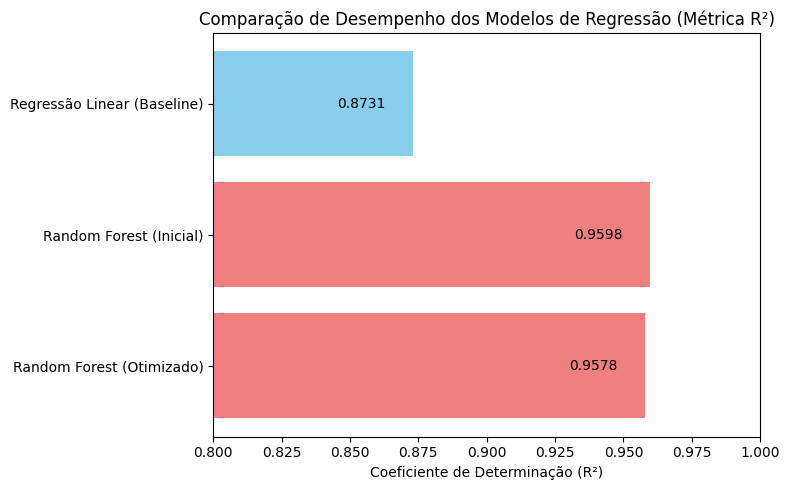

Gráfico de comparação de R² salvo como regressao_r2_comparacao.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Dados da tabela de resultados de regressão
# Certifique-se de que estes valores estão corretos no seu notebook.
data = {
    "Modelo": ["Regressão Linear (Baseline)", "Random Forest (Inicial)", "Random Forest (Otimizado)"],
    "R²": [0.8731, 0.9598, 0.9578],
    "RMSE": [0.11, 0.06, 0.06],
    "MAE": [0.07, 0.02, 0.02]
}
df_reg = pd.DataFrame(data)

# 2. Configuração e Geração do Gráfico de comparação de R²
plt.figure(figsize=(8, 5))
# Cores para destacar o baseline e os modelos de melhor desempenho
bars = plt.barh(df_reg['Modelo'], df_reg['R²'], color=['skyblue', 'lightcoral', 'lightcoral'])

# Adicionar o valor de R² nas barras para facilitar a leitura
for bar in bars:
    plt.text(bar.get_width() - 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', 
             va='center', ha='right', color='black', fontsize=10)

plt.xlabel('Coeficiente de Determinação (R²)')
plt.title('Comparação de Desempenho dos Modelos de Regressão (Métrica R²)')
# Ajusta o eixo X para focar nos valores mais altos de R²
plt.xlim(0.8, 1.0) 
plt.gca().invert_yaxis() # Inverte o eixo Y para que o primeiro modelo apareça no topo
plt.tight_layout()

# 3. Salvar e Mostrar o Gráfico
output_path = "regressao_r2_comparacao.png"
plt.savefig(output_path)
plt.show() # Use plt.show() no notebook para exibir o gráfico

print(f"Gráfico de comparação de R² salvo como {output_path}")
